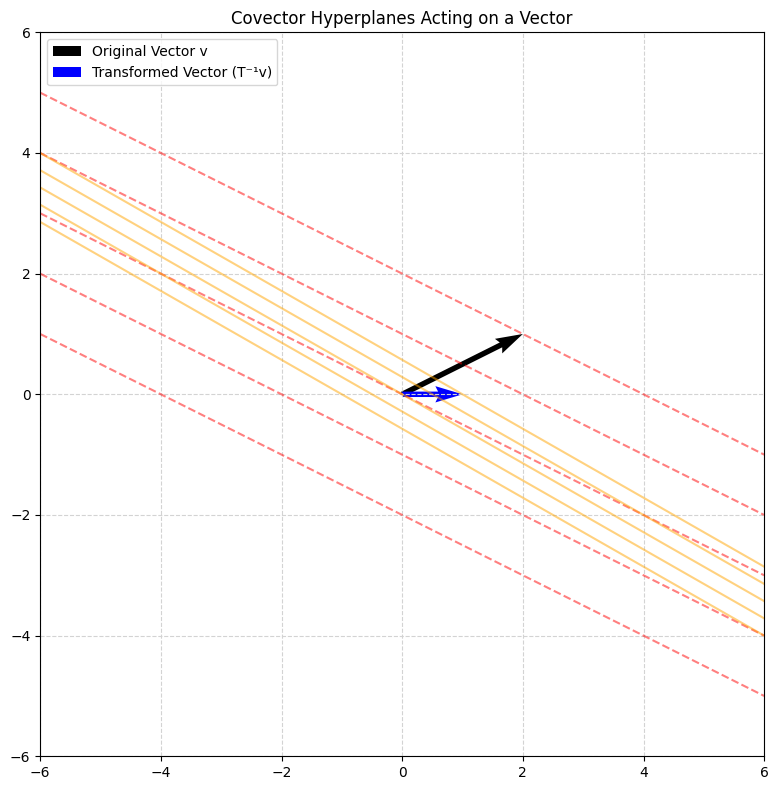

In [8]:
#contra variant transformation
import numpy as np
import matplotlib.pyplot as plt

# Define the original vector (could represent velocity)
v = np.array([2, 1])

# Define a covector (e.g., gradient), acting as a row vector
omega = np.array([1, 2])  # Covector acts via dot product

# Define transformation matrix (new basis)
T = np.array([[2, 1],
              [1, 3]])

# Transformations
T_inv = np.linalg.inv(T)
v_contra = T_inv @ v          # Contravariant transformation of vector
omega_co = omega @ T          # Covariant transformation of covector

# Evaluate inner product (should be the same before and after transformation)
original_action = omega @ v
transformed_action = omega_co @ v_contra

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', color='lightgray')
ax.set_title("Covector Hyperplanes Acting on a Vector")

# Plot original vector
ax.quiver(0, 0, *v, color='black', angles='xy', scale_units='xy', scale=1, label='Original Vector v')

# Plot covector hyperplanes (omega • x = const)
x_vals = np.linspace(-6, 6, 400)
for c in [-4, -2, 0, 2, 4]:
    # Line: omega[0] * x + omega[1] * y = c → y = (c - omega[0]*x)/omega[1]
    y_vals = (c - omega[0] * x_vals) / omega[1]
    ax.plot(x_vals, y_vals, 'r--', alpha=0.5)

# Plot vector after transformation
ax.quiver(0, 0, *v_contra, color='blue', angles='xy', scale_units='xy', scale=1, label='Transformed Vector (T⁻¹v)')

# Plot transformed covector hyperplanes (omega_co • x = const)
for c in [-4, -2, 0, 2, 4]:
    y_vals_transformed = (c - omega_co[0] * x_vals) / omega_co[1]
    ax.plot(x_vals, y_vals_transformed, 'orange', alpha=0.5)

# Add legend and show
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()


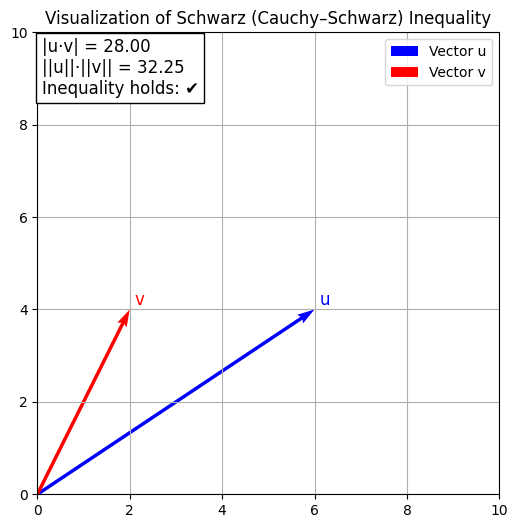

In [9]:
#Schwarz’s Inequality
import numpy as np
import matplotlib.pyplot as plt

vec1 = list(map(float, input("First vector (x,y): ").split(',')))
vec2 = list(map(float, input("Second vector (x,y): ").split(',')))

# Define two 2D vectors
u = np.array(vec1)
v = np.array(vec2)

# Compute dot product and magnitudes
dot_product = np.dot(u, v)
norm_u = np.linalg.norm(u)
norm_v = np.linalg.norm(v)
rhs = norm_u * norm_v

# Plot setup
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Visualization of Schwarz (Cauchy–Schwarz) Inequality")

# Plot vectors u and v
ax.quiver(0, 0, *u, angles='xy', scale_units='xy', scale=1, color='blue', label='Vector u')
ax.quiver(0, 0, *v, angles='xy', scale_units='xy', scale=1, color='red', label='Vector v')

# Add labels
ax.text(*(u + 0.1), 'u', color='blue', fontsize=12)
ax.text(*(v + 0.1), 'v', color='red', fontsize=12)

# Show the inequality as text
text = f"|u·v| = {abs(dot_product):.2f}\n||u||·||v|| = {rhs:.2f}\n"
text += "Inequality holds: " + ("✔️" if abs(dot_product) <= rhs else "Nope")

ax.text(0.09, 8.67, text, fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

ax.legend()
plt.show()


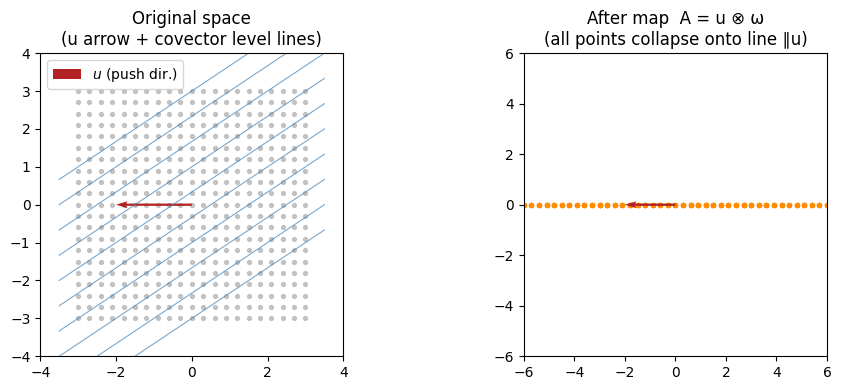

Vector u: [-2.  0.]
Covector omega: [ 1.  -1.5]
Outer‑product matrix A = u ⊗ ω:
 [[-2.  3.]
 [ 0. -0.]]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# --- EDIT THESE VECTORS IF YOU LIKE ---------------------------------
u      = np.array([-2.0, 0])   # 2‑D vector  (push direction, lives in tangent space)
omega  = np.array([1.0, -1.5])  # 2‑D covector (measurement direction, lives in cotangent space)
# --------------------------------------------------------------------

# Outer‑product matrix A = u ⊗ omega  (rank‑1 linear map)
A = np.outer(u, omega)          # shape (2,2)

# Build a grid of sample points to show the transformation
xs = np.linspace(-3, 3, 21)
ys = np.linspace(-3, 3, 21)
grid_x, grid_y = np.meshgrid(xs, ys)
pts = np.vstack([grid_x.ravel(), grid_y.ravel()])     # shape 2×N

# Apply outer‑product map to every point
mapped = A @ pts

# ------------------------------------------------------------ plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=False, sharey=False)

# ---- panel (a) : original space with u‑arrow and covector lines ----
ax[0].scatter(pts[0], pts[1], s=8, color="#999", alpha=0.5)
ax[0].quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color="firebrick",
             label=r"$u$ (push dir.)", linewidth=2)

# draw several level‑lines omega(x)=c
c_vals = np.linspace(-4.5, 4.5, 10)
xx = np.linspace(-3.5, 3.5, 200)
for c in c_vals:
    # omega = [a,b]; line a*x + b*y = c  ⇒ y = (c - a*x)/b
    if abs(omega[1]) > 1e-9:
        yy = (c - omega[0]*xx) / omega[1]
        ax[0].plot(xx, yy, color="steelblue", linewidth=0.8, alpha=0.7)
ax[0].set_title("Original space\n(u arrow + covector level lines)")
ax[0].set_aspect('equal')
ax[0].set_xlim(-4, 4)
ax[0].set_ylim(-4, 4)
ax[0].legend()

# ---- panel (b) : transformed points after outer product ------------
ax[1].scatter(mapped[0], mapped[1], s=8, color="darkorange", alpha=0.8)
ax[1].quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color="firebrick",
             linewidth=2)
ax[1].set_title("After map  A = u ⊗ ω\n(all points collapse onto line ∥u)")
ax[1].set_aspect('equal')
ax[1].set_xlim(-6, 6)
ax[1].set_ylim(-6, 6)

plt.tight_layout()
plt.show()

print("Vector u:", u)
print("Covector omega:", omega)
print("Outer‑product matrix A = u ⊗ ω:\n", A)
